	checkpoint directory created: ./model
	saving model version 0.0
experiment: PyKAN | dataset=SAD | KAN shape=[[53, 0], [1, 0], [2, 0]]


| train_loss: 7.29e-01 | test_loss: 7.43e-01 | reg: 2.75e+01 | : 100%|█| 10/10 [00:43<00:00,  4.38s/


	saving model version 0.1
	saving model version 0.2


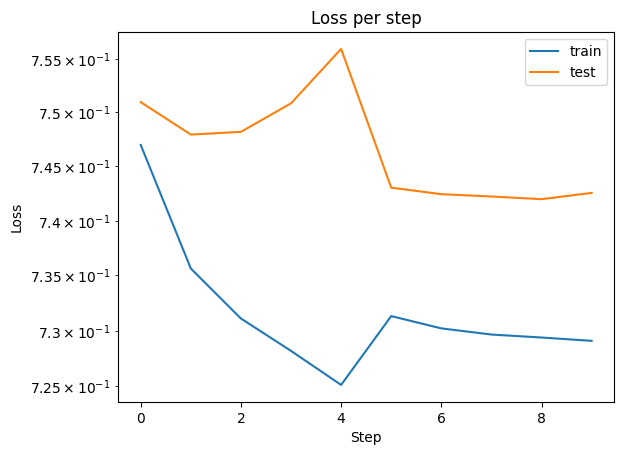

<Figure size 640x480 with 0 Axes>

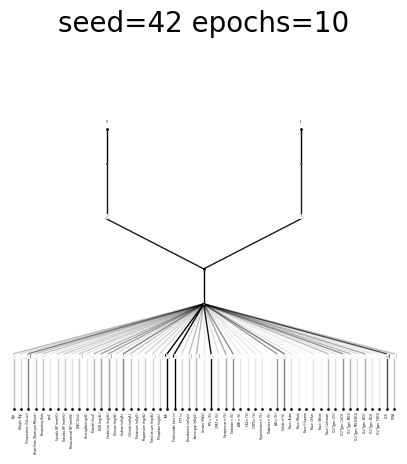

{'accuracy': 72.64066686513844, 'f1': 70.84323943961293, 'precision': 71.56546249165442, 'recall': 70.4959541833611, 'fpr': 18.799603174603174, 'fnr': 40.20848845867461}


In [33]:
import torch
import pickle
from pykan.kan import KAN
from src.preprocessing import load_and_preprocess_mimic
from src.train_kan import train_kan_model

# Load and preprocess data
data_dict = load_and_preprocess_mimic(path="data/MIMIC-IV.dta")

# Save preprocessing objects
with open("models/scaler_cont.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_cont"], f)

with open("models/scaler_ord.pkl", "wb") as f:
    pickle.dump(data_dict["scaler_ord"], f)

with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(data_dict["label_encoders"], f)

with open("models/original_df.pkl", "wb") as f:
    pickle.dump(data_dict["original_data"], f)

# Save feature info
feature_config = {
    "continuous_labels": data_dict["continuous_labels"],
    "binary_labels": data_dict["binary_labels"],
    "ordinal_labels": data_dict["ordinal_labels"], 
    "original_continuous_indices": data_dict["original_continuous_indices"],
    "original_ordinal_indices": data_dict["original_ordinal_indices"],
    "original_binary_indices": data_dict["original_binary_indices"]
}

with open("models/feature_config.pkl", "wb") as f:
    pickle.dump(feature_config, f)

# Train the KAN model
results = train_kan_model(
    dataset=dict(list(data_dict.items())[:4]),
    original_data=data_dict['original_data'],
    num_epochs=10,
    with_graphs=True
)

model = results["model"]

torch.save(model.state_dict(), "kan_model.pt")

# Print metrics
print(results["metrics"])

In [2]:
model = KAN(
    width=[53, 1, 2], grid=5, k=3,
    seed=42, device=None
)

	checkpoint directory created: ./model
	saving model version 0.0


In [3]:
state_dict = torch.load("kan_model.pt")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [4]:
model.eval()

MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  output_range_spline = torch.std(postacts_numerical, dim=0) # for training, only penalize

In [7]:
x = torch.tensor([0.4941, 0.1310, 0.5806, 0.6543, 0.4667, 0.7600, 0.1872, 0.1105, 0.1205,
        0.1879, 0.4000, 0.2505, 0.0385, 0.0101, 0.1212, 0.5000, 0.4146, 0.2192,
        0.2308, 0.4692, 0.1370, 0.0220, 0.0287, 0.0802, 0.5870, 0.2391, 1.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0667])

len(x)

53

In [11]:
x = x.to('cpu')  # If you're using GPU
if x.dim() == 1:
    x = x.unsqueeze(0)
output = model(x)


c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:798: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  self.subnode_actscale.append(torch.std(x, dim=0).detach())
c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:808: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  input_range = torch.std(preacts, dim=0) + 0.1
c:\Users\FerroFast\KAN\pykan\kan\MultKAN.py:809: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  output_range_spline = torch.std(postacts_numerical, dim=0) # for training, only penalize

In [27]:
model = KAN(width=[53, 1, 2], grid=5, k=3, seed=42)
model.load_state_dict(torch.load("kan_model.pt", map_location=torch.device("cpu")))

	checkpoint directory created: ./model
	saving model version 0.0


<All keys matched successfully>

In [34]:
model.feature_score

tensor([0.0902, 0.0462, 0.1894, 0.0755, 0.0787, 0.0360, 0.0548, 0.0676, 0.0449,
        0.0764, 0.0398, 0.0955, 0.1352, 0.1304, 0.0485, 0.1787, 0.0814, 0.0434,
        0.0622, 0.0564, 0.0526, 0.9952, 1.0264, 0.0519, 0.0890, 0.0963, 0.0312,
        0.5827, 0.0403, 0.1179, 0.1626, 0.0295, 0.0264, 0.0352, 0.0265, 0.0132,
        0.1396, 0.1900, 0.0399, 0.0165, 0.0123, 0.0337, 0.0134, 0.0931, 0.0414,
        0.1557, 0.1010, 0.0438, 0.1164, 0.0330, 0.0270, 0.2912, 0.0898],
       grad_fn=<MeanBackward1>)

In [ ]:
print(model.spline_postacts)

[tensor([[[-0.0629, -0.0455, -0.0385,  0.1903, -0.0018, -0.0147, -0.0904,
           0.0055, -0.0388,  0.1079, -0.0318, -0.0619, -0.0583,  0.1065,
           0.0983, -0.0936,  0.2070, -0.0209,  0.0093, -0.0319, -0.0169,
          -0.0191,  0.3757,  0.5250, -0.0185, -0.0958,  0.2685,  0.1753,
           0.0790, -0.0792, -0.0865,  0.0113,  0.0056,  0.0659,  0.0395,
           0.0134, -0.1009,  0.1096, -0.0174, -0.0163, -0.0080,  0.0766,
          -0.0076,  0.0222, -0.0512, -0.0377,  0.0697,  0.0115,  0.1281,
          -0.0320, -0.0081,  0.1434,  0.1623]]]), tensor([[[ 2.9666],
         [-1.6010]]])]
